# Exploring Cosmic Microwave Background Data

Click inside the cell below this one and hit the SHIFT and ENTER keys at the same time.

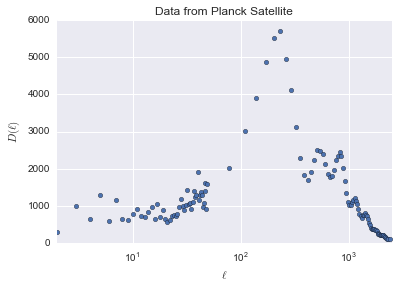

In [30]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_context("notebook") ## This makes things look prettier
%matplotlib inline

spec_data = pd.read_csv("data/spec_data.csv")

spec_data.plot(x='ell', y='D(ell)', kind='scatter', logx=True, xlim=[2.,2500.], ylim=[0,6000])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D(\ell)$')
plt.title("Data from Planck Satellite")

This is a plot of the power spectrum in the cosmic microwave background. It is, quite literally, a baby picture of our universe.

There is an unbelievable amount of information hidden in this one simple image, but at the moment, none of that information is obvious because I haven't told you anything about it! You might have questions like

* What are these axes? 
* What is $\ell$ and what is $D(\ell)$ ? 
* What is the meaning of this big peak and these secondary peaks? What physics is encoded in this tail behavior?
* If this is _measured_ data, how does it compare with _predictions_ from theory?

and more.

In a lecture, I would tell you the answers to these questions. But today, you're going to break into small groups and ask these questions yourselves. Your mission is to look at the data and decide which questions you find most interesting. Then you can ask the facilitators -- me, Ms. Mauro, Michelle, or Takumi -- for help in investigating your questions.

We'll give you hints and hand out snippets of code for you to type in and evaluate, which will help you understand and answer the questions you come up with, but the ultimate responsibility for answering the questions lies with *you*. Today, you play the scientists: you get to choose what's interesting and worth investigating. At the end, I'll ask you to summarize what you've learned and ask what questions remain unanswered.

Sound like fun? I sure think so. Let's dive in!

## Code Snippet 1

This snippet is distributed to students who ask about the plateau in the low-ell region.

The goal is to fit the functional form of $D(\ell)$ vs. $\ell$ to a power-law

$$ D(\ell) = A \cdot \ell^{n_t - 1}$$

The students should find fit values of

$$\text{Best } A =  386.500629168$$
$$\text{Best } n_t =  1.30271484034$$

In [31]:
## Code snippet 1

from scipy.optimize import curve_fit

small_ell_data = spec_data[spec_data["ell"]<50]
small_ells = small_ell_data["ell"].values
small_D_ells = small_ell_data["D(ell)"].values

def my_fit_function(ell, A, n_t):
    return A*(ell)**(n_t - 1)

fit_result = curve_fit(my_fit_function, small_ells, small_D_ells)

print("Best A = ", fit_result[0][0])
print("Best n_t = ", fit_result[0][1])

('Best A = ', 386.50063082611331)
('Best n_t = ', 1.3027148391049668)


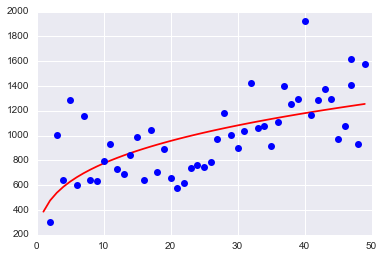

In [32]:
A = 386.5 ## Change this to your number for A!
n_t = 1.3027 ## Change this to your number for n_t!

my_test_ells = [ell for ell in range(1, 50)]
my_test_D_ells = [my_fit_function(ell, A, n_t) for ell in range(1, 50)]

plt.plot(my_test_ells, my_test_D_ells, 'r') ## Red line for the fit
plt.plot(small_ells, small_D_ells, 'bo') ## Blue dots for data

## Code Snippet 2

This code is distributed to students who ask about fitting the observed CMB data to some theoretical model.

The snippet compared predictions from CAMB to the experimental observations from Planck.

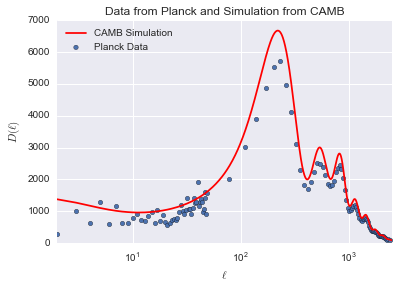

In [33]:
camb_data = pd.read_csv("data/camb_data.csv")

combined_plot = spec_data.plot(x='ell', y='D(ell)', 
    kind='scatter', logx=True, xlim=[2.,2500.], ylim=[0,7000])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$D(\ell)$')
camb_data.plot(x='CAMB_ell', y='CAMB_D(ell)', kind='line', 
    logx=True, xlim=[2.,2500.], ylim=[0,7000], ax=combined_plot, color='red')

plt.legend(["CAMB Simulation","Planck Data"], loc=2)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D(\ell)$')

plt.title("Data from Planck and Simulation from CAMB")

## Code Snippet 3

This code snippet is distributed after discussing the geometry of space and its relationship to the $\ell$ value of the first peak in the CMB spectrum data.

In [34]:
spec_data.sort_values(by="D(ell)", ascending=False)

,Unnamed: 0,ell,D(ell),Uncertainty in ell,Uncertainty in D(ell)
54,54,233.0,5703.160,15.0,95.140
53,53,202.0,5524.530,15.0,101.050
55,55,264.0,4953.540,15.0,81.720
52,52,171.0,4867.410,15.0,97.940
56,56,295.0,4116.060,15.0,64.140
51,51,140.0,3893.830,15.0,87.350
57,57,326.0,3123.860,15.0,46.600
50,50,109.0,3027.820,15.0,73.290
63,63,512.0,2506.610,15.0,28.890
64,64,543.0,2484.240,15.0,28.780


## Code Snippet 4

This snippet is distributed after discussing the multipole moment $\ell$ and spherical harmonics.

Students have the opportunity to plot spherical harmonics $Y_{\ell}^m$ for various $\ell, m$ to gain intuition for the properties of these functions.

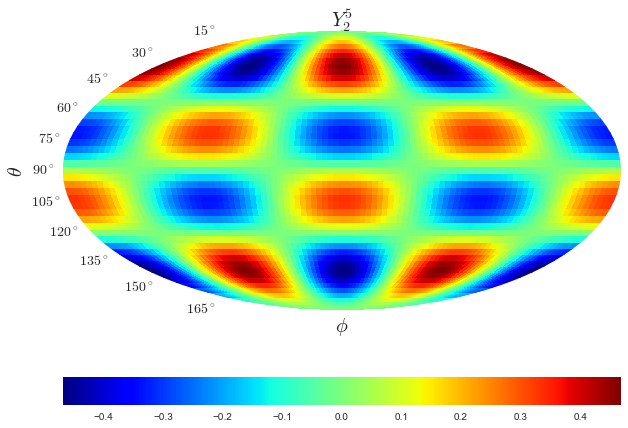

In [35]:
%run data/spharm.py

plot_spherical_harmonic(l=5, m=2)

## Code Snippet 5a

Distribute this to students after discussing how the experimental apparatus computes a temperature when looking at a small patch of sky.

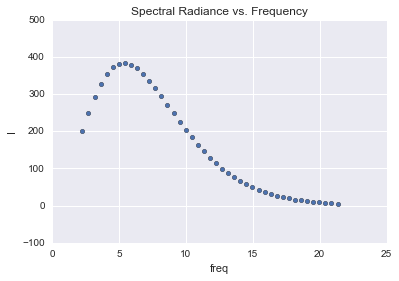

In [36]:
patch_freq = pd.read_csv("data/patch_freq.csv")
patch_freq.plot(x='freq', y='I',kind='scatter')
plt.title("Spectral Radiance vs. Frequency")

## Code Snippet 5b

Distribute after students have plotted the frequency distribution in 5a, and after discussing how a black body at a given temperature radiates light with a combination of different frequencies. 

Going backwards, if we know “how much” light of each frequency is emitted by some object, we can calculate its temperature!

In [37]:
from scipy.optimize import curve_fit
%run data/black_body.py

patch_frequencies = patch_freq["freq"].values
patch_intensities = patch_freq["I"].values

fit_result = curve_fit(black_body, patch_frequencies, patch_intensities)

print("Estimate of CMB temperature = ", fit_result[0][0])

('Estimate of CMB temperature = ', 2.7250094036918231)


## Code Snippet 5c

Distribute this after students have obtained a temperature estimate in code snippet 5c. This snippet allows them to see visually how well the black-body curve with their chosen temperature fits the data.

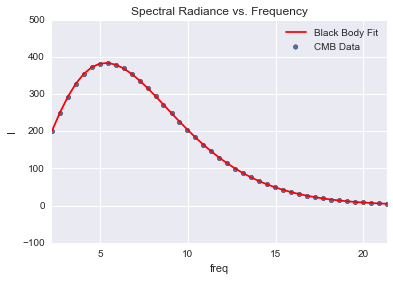

In [38]:
my_T = 2.725 ## Change this to your estimate of CMB temperature!

patch_freq["fit"] = [black_body(i, my_T) for i in patch_freq["freq"].values]

same_plot = patch_freq.plot(x='freq', y='I', kind='scatter')
patch_freq.plot(x='freq', y='fit', ax=same_plot, kind='line', color='red')
plt.legend(["Black Body Fit","CMB Data"])
plt.title("Spectral Radiance vs. Frequency")

## Code Snippet 6

Distribute this after talking about photon diffusion and an exponential fit for the tail.

('Best A = ', 2189.7807962839279)
('Best k = ', 0.002020414614933796)


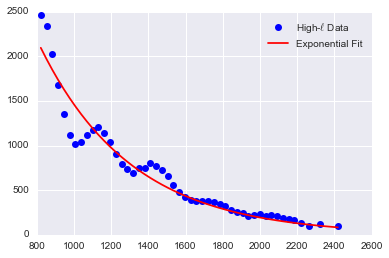

In [39]:
from scipy.optimize import curve_fit

ell_0 = 800 ## Starting value for "high ell" regime

big_ell_data = spec_data[spec_data["ell"] > ell_0]
big_ells = big_ell_data["ell"].values
big_D_ells = big_ell_data["D(ell)"].values

def exponential_function(ell, A, k):
    return A*np.exp(-k*(ell-ell_0))

fit_result = curve_fit(exponential_function, 
                       big_ells, big_D_ells, p0=[2500, 0.02])

print("Best A = ", fit_result[0][0])
print("Best k = ", fit_result[0][1])

plt.plot(big_ells, big_D_ells, 'bo')
plt.plot(big_ells, 
         [exponential_function(ell,fit_result[0][0], fit_result[0][1]) 
          for ell in big_ells], 'r-')
plt.legend(['High-$\ell$ Data', 'Exponential Fit'])